<a href="https://colab.research.google.com/github/paolo0o0/computational_math/blob/main/linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# День 2: Pandas и линейные модели

## Почему вам будет полезен этот семинар:

1. Вы научитесь работать с табличными данными на языке Python
2. Вы познакомитесь с этапами построения модели машинного обучения
3. Самостоятельно обучите модель
4. Узнаете, как правильно оценивать результаты работы моделей машинному обучению

Это поможет вам грамотнее управлять проектами по машинному обучению и лучше понимать их специфику.

**Область применения:**

* Прогноз стоимости ценных бумаг
* Анализ спроса, объема продаж
* Медицинские диагнозы
* Любые зависимости числа от времени
* Прогнозирование цен на недвижимость
* И многое другое....

## О себе

### Павел Шаталов

- Сколтех, Data Science
- Сбербанк, Риски
- Лаборатория Сколтех-Сбер
- СберУниверситет


<table>
<tr>
<td>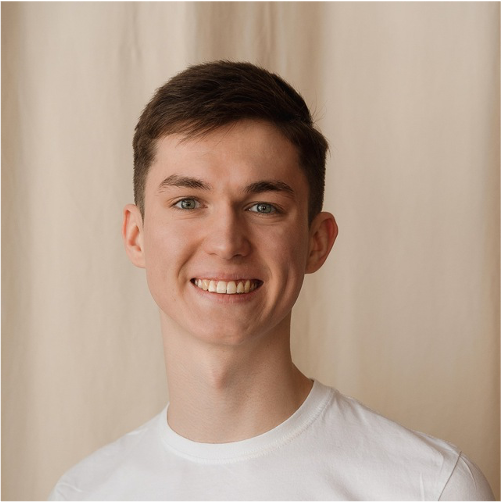</td>
<td>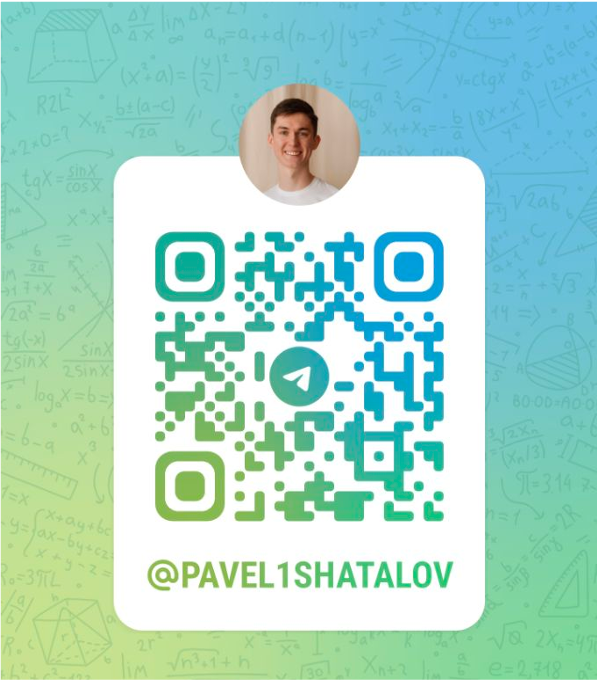</td>
</tr>

# Pandas

Чтобы не писать название библиотеки целиком каждый раз, когда понадобится ее использовать, принято сокращать название библиотеки и импортировать ее как "pd":

In [219]:
import pandas as pd

В Pandas есть тип данных датафрейм (DataFrame), в котором удобно хранить таблицы с данными. Создадим объект такого типа самостоятельно:

In [220]:
df = pd.DataFrame() # создали пустой датафрейм с помощью метода DataFrame() библиотеки pandas (pd)
df['a'] = [10, 20, 30] # создаем колонку "а" и помещаем в нее столбец с данными - [10, 20, 30]
df # Чтобы напечать табличку, в конце ячейки прописываем название

,a
0,10
1,20
2,30


In [221]:
df['b'] = ['one', 'two', 'three']
df

,a,b
0,10,one
1,20,two
2,30,three


Конечно, чаще всего приходится работать с уже готовыми наборами данных. Такие данные обычно хранятся в формате xls(x) - для работы в Excel, или (чаще) в формате csv - comma-separated value. Попробуем импортировать csv файл с данными о пассажирах Титаника.

In [222]:
data = pd.read_csv('https://www.dropbox.com/scl/fi/pphp7nywdsj4fw77p8ae8/titanic.csv?rlkey=wvh50xrijq36ba0b9y50yhj83&dl=1')

Функция read_csv читает данные из файла формата csv и преобразует в pandas.DataFrame. Аналогичная функция read_excel может читать данные в формате xls(x).

Посмотрим на наши данные:

In [223]:
data.head() # функция head() показывает первые строки датафрейма, по умолчанию 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [224]:
data.head(2) # можно передать аргументом количество строк, которые хотите увидеть

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [225]:
data.head(1).T # можно транспонировать результат

,0
PassengerId,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25


In [226]:
data.tail(2) # можно посмотреть последние записи

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [227]:
data.shape # функция shape показывает размерность датафрейма (количество строк и столбцов)

(891, 12)

In [228]:
data.columns # список столбцов

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Описание признаков:

**PassengerId** - id пассажира

**Survived** бинарная переменная: выжил пассажирил (1) или нет (0)

**Pclass** - класс пассажира

**Name** - имя пассажира

**Sex** - пол пассажира

**Age** - возраст пассажира

**SibSp** - количество родственников (братьев, сестер, супругов) пассажира на борту

**Parch** - количество родственников (родителей / детей) пассажира на борту

**Ticket** - номер билета

**Fare** - тариф (стоимость билета)

**Cabin** - номер кабины

**Embarked** - порт, в котором пассажир сел на борт (C - Cherbourg, S - Southampton, Q = Queenstown)

Так можно обратиться к столбцу:

In [229]:
data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

Или к нескольким столбцам сразу:

In [230]:
data[['Age', 'Sex']].head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


A так - к строке по индексу:

In [231]:
data.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [232]:
data.iloc[0:3] # строки с 0 по 2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Кроме того, можно выбирать объекты, удовлетворяющие каким-то свойствам, например, все пассажиры-женщины:

In [233]:
data[data.Sex == 'female'].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Пассажиры первого класса:

In [234]:
data[data.Pclass == 1].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Пассажиры первого или второго классов:

In [235]:
data[data.Pclass.isin([1,2])].head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Пассажиры младше 18:

In [236]:
data[data.Age < 18].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


Девушки в возрасте от 18 до 25:

In [237]:
data[(data.Sex == 'female') & (data.Age >= 18) & (data.Age <= 25)].head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S


##### **УПРАЖНЕНИЕ:** Сколько мужчин от 20 до 40 включительно?

In [238]:
# ТУТ ВАШ КОД
data[(data.Sex == 'male') & (data.Age >= 20) & (data.Age <= 40)].shape[0]

262

Иногда нужно создать новый признак из уже существующих, например, нам интересно, сколько всего родственников путешествовало с каждым пассажиром - просто сложим столбцы SibSp и Parch и поместим сумму в новый столбец FamilySize.

In [239]:
data['FamilySize'] = data['SibSp'] + data['Parch']
data.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


А теперь давайте создадим переменную, которая бы нам показывала, что пассажир ехал в одиночку. Такой пассажир путешествовал без родственников. Мы напишем условие с помощью анонимной функции (1, если FamilySize равно 0 и 0 во всех остальных случаях) и применим ее к столбцу FamilySize с помощью метода .apply().

In [240]:
data['Alone'] = data['FamilySize'].apply(lambda x: 1 if x == 0 else 0)
data.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0,1


Для категориальных данных удобно посмотреть уникальные значения

In [241]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

##### **УПРАЖНЕНИЕ:** Семей какого размера больше?

In [242]:
# ТУТ ВАШ КОД
data['FamilySize'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

Для количественных данных удобнее смотреть минимальные/максимальные/средние значения:

In [243]:
print(data['Age'].min())
print(data['Age'].max())
print(data['Age'].mean())

0.42
80.0
29.69911764705882


В Pandas есть функция describe(), которая делает удобную сводную таблицу по всем количественным столбцам сразу (обратите внимание, что для Pandas количественные данные = все, что представлено числами, что, разумеется, неверно в общем случае):

In [244]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


Удалим строчки с пропусками в данных

In [245]:
data.dropna(how='any').shape

(183, 14)

In [246]:
data.dropna(how='any').sort_values(by=['Age']).tail() # сортируем по возрасту, по умолчанию сортировка по возрастанию

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1,0
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S,0,1
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,2,0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,1
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,0,1


In [247]:
data.dropna(how='any').sort_values(by=['Age', 'Fare'], ascending=[False, True]).head()
# сортируем сперва по возрасту (по убыванию),
# потом стоимости билета (по возрастанию)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,0,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,1
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,2,0
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S,0,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1,0


Сводные таблицы

In [248]:
data[['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


##### **УПРАЖНЕНИЕ:** Кто чаще выживает на Титанике? Женщины или мужчины?

In [249]:
# ТУТ ВАШ КОД
data[['Survived', 'Sex']].groupby(by = ['Sex']).sum()

,Survived
Sex,
female,233
male,109


Все модификации данных можно сохранить в csv файл:

In [250]:
data.to_csv('new_titanic.csv')

# Бонус: Линейные модели

На первом занятии мы научимся базовым приемам обучения моделей машинного обучения и поближе познакомимся с линейными моделями.

Мы будем работать с набором данных Bikes Rent, в котором по дням записаны календарная информация и погодные условия, характеризующие автоматизированные пункты проката велосипедов, а также число прокатов в этот день. Именно __число прокатов велосипедов__ мы и будем __предсказывать__; таким образом, мы будем решать задачу __регрессии__.

Для каждого дня проката известны следующие __признаки__:
* _season_: 1 - зима, 2 - весна, 3 - лето, 4 - осень
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: от 1 до 12 (соответственно январь--декабрь)
* _holiday_: 0 - нет праздника, 1 - есть праздник
* _weekday_: от 0 до 6 (соответственно воскресенье--суббота)
* _workingday_: 0 - нерабочий день, 1 - рабочий день
* _weathersit_: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* _temp_: температура в градусах Цельсия (нормированная)
* _hum_: влажность (нормированная)
* _windspeed(ms)_: скорость ветра в метрах в секунду (нормированная)
* _cnt_: количество арендованных велосипедов (это целевая переменная, ее мы будем предсказывать)

Для практики специально выбраны небольшие данные, чтобы построение моделей выполнялось быстро, а рассматриваемая задача и признаки были просты для интерпретации. Стоит отметить, что весь код, который мы будем писать, применим для совершенно любых данных; нужно только заменить название файла.

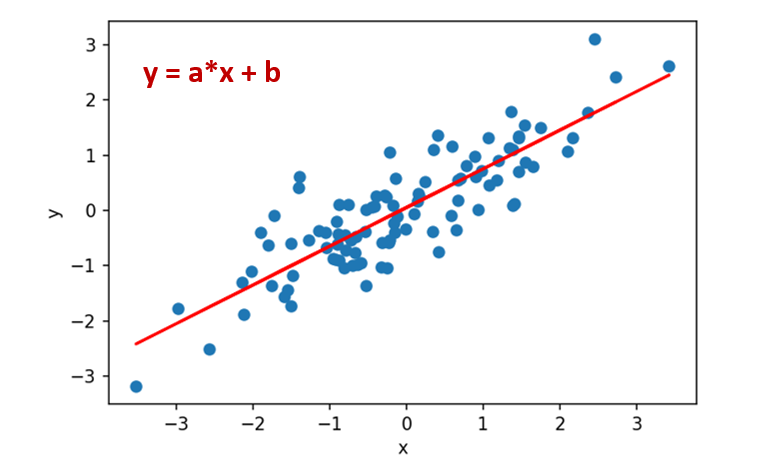

В практике нам потребуются две библиотеки:

* Pandas (от "panel data") - для подготовки данных
С документацией для данной библиотеки можно ознакомиться здесь: https://pandas.pydata.org/docs/

* Sklearn (scikit-learn) - основная библиотека для машинного обучения. С документацией для данной библиотеки можно ознакомиться здесь:
https://scikit-learn.org/stable/user_guide.html

Нашей основной целью будет познакомиться с библиотекой sklearn - именно она отвечает за построение моделей, и благодаря тому, что она работает с уже подготовленными данными, код для этой библиотеки достаточно простой и унифицированный.

Далее мы выполним минимальный набор действий по загрузке данных и построению на них модели машинного обучения. План шагов:
1. Загрузка данных
1. Подготовка данных
1. Обучение модели
1. Предсказания модели
1. Оценивание качества модели
1. Анализ модели

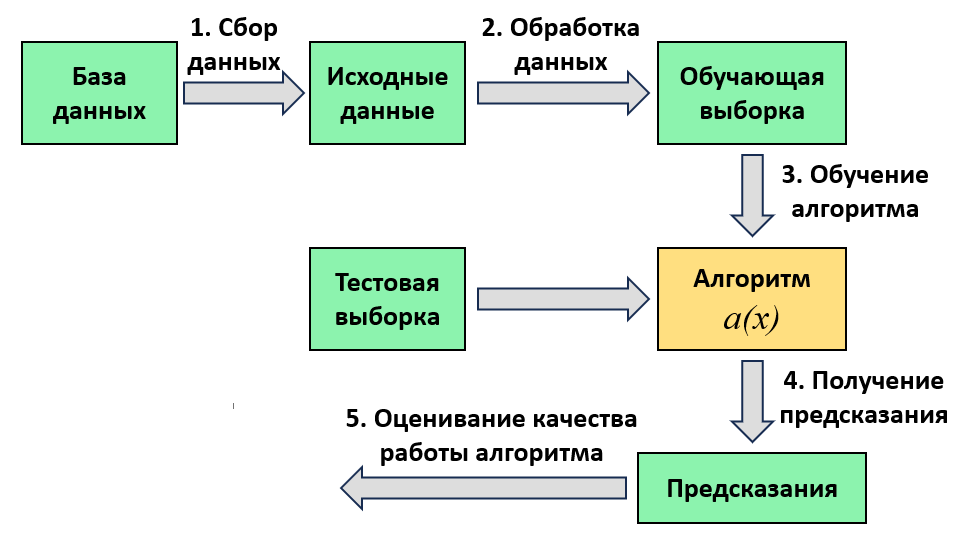

### Шаг 1. Загрузка данных

Загрузим данные с помощью библиотеки Pandas.

Импортируем библиотеку, сообщая Python, что далее мы будем обращаться к этой библиотеке как pd (as pd):

In [251]:
import pandas as pd #импортируем библиотеку pandas

Загружаем данные, использу функцию `read_excel` по ссылке::

In [252]:
data = pd.read_excel("https://github.com/mbburova/data/raw/main/bike.xlsx") # загружаем таблицу формата xlsx

Также мы могли бы подгрузить данные напрямую из файла, часто еще используются файлы формата csv:

In [253]:
#data = pd.read_csv('bike.csv', sep = ';')  #загружаем файл формата сsv, разделитель ;

Посмотрим на фрагмент данных, для этого удобно использовать функцию `.head(N)`, которая показывает первые N строк данных. По умолчанию N=5, то есть показываются 5 строк.

In [254]:
data.head() #выводим первые пять строчек

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed(ms),cnt
0,1,0,1,0,6,0,2,0.355170,0.828620,0.284606,985
1,1,0,1,0,0,0,2,0.379232,0.715771,0.466215,801
2,1,0,1,0,1,1,1,0.171000,0.449638,0.465740,1349
3,1,0,1,0,2,1,1,0.175530,0.607131,0.284297,1562
4,1,0,1,0,3,1,1,0.209120,0.449313,0.339143,1600


По строкам таблицы расположены дни работы проката (объекты), по столбцам - их характеристики (признаки).
Расшифровки столбцов были даны выше. В последнем столбце записаны значения cnt (число арендованных велосипедов) - это наша целевая переменная.

Число объектов и число признаков хранятся в переменной shape:

In [255]:
# число строк, число столбцов
data.shape

(731, 11)

### ШАГ 2. Изучение данных

Мы можем вывести общую информацию про наши данные: количество непустых элементов в каждом столбце и тип каждого столбца

In [256]:
data.info() #общая информация про данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         731 non-null    int64  
 1   yr             731 non-null    int64  
 2   mnth           731 non-null    int64  
 3   holiday        731 non-null    int64  
 4   weekday        731 non-null    int64  
 5   workingday     731 non-null    int64  
 6   weathersit     731 non-null    int64  
 7   temp           731 non-null    float64
 8   hum            731 non-null    float64
 9   windspeed(ms)  731 non-null    float64
 10  cnt            731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


Выведем описательные статистики для нашей таблицы

In [257]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.0,2.000000,3.000000,3.000000,4.0
yr,731.0,0.500684,0.500342,0.0,0.000000,1.000000,1.000000,1.0
mnth,731.0,6.519836,3.451913,1.0,4.000000,7.000000,10.000000,12.0
holiday,731.0,0.028728,0.167155,0.0,0.000000,0.000000,0.000000,1.0
weekday,731.0,2.997264,2.004787,0.0,1.000000,3.000000,5.000000,6.0
workingday,731.0,0.683995,0.465233,0.0,0.000000,1.000000,1.000000,1.0
weathersit,731.0,1.395349,0.544894,1.0,1.000000,1.000000,2.000000,3.0
temp,731.0,0.543594,0.228091,0.0,0.346343,0.547268,0.743002,1.0
hum,731.0,0.645649,0.146457,0.0,0.534704,0.644388,0.750857,1.0
windspeed(ms),731.0,0.346536,0.159766,0.0,0.232045,0.326928,0.434622,1.0


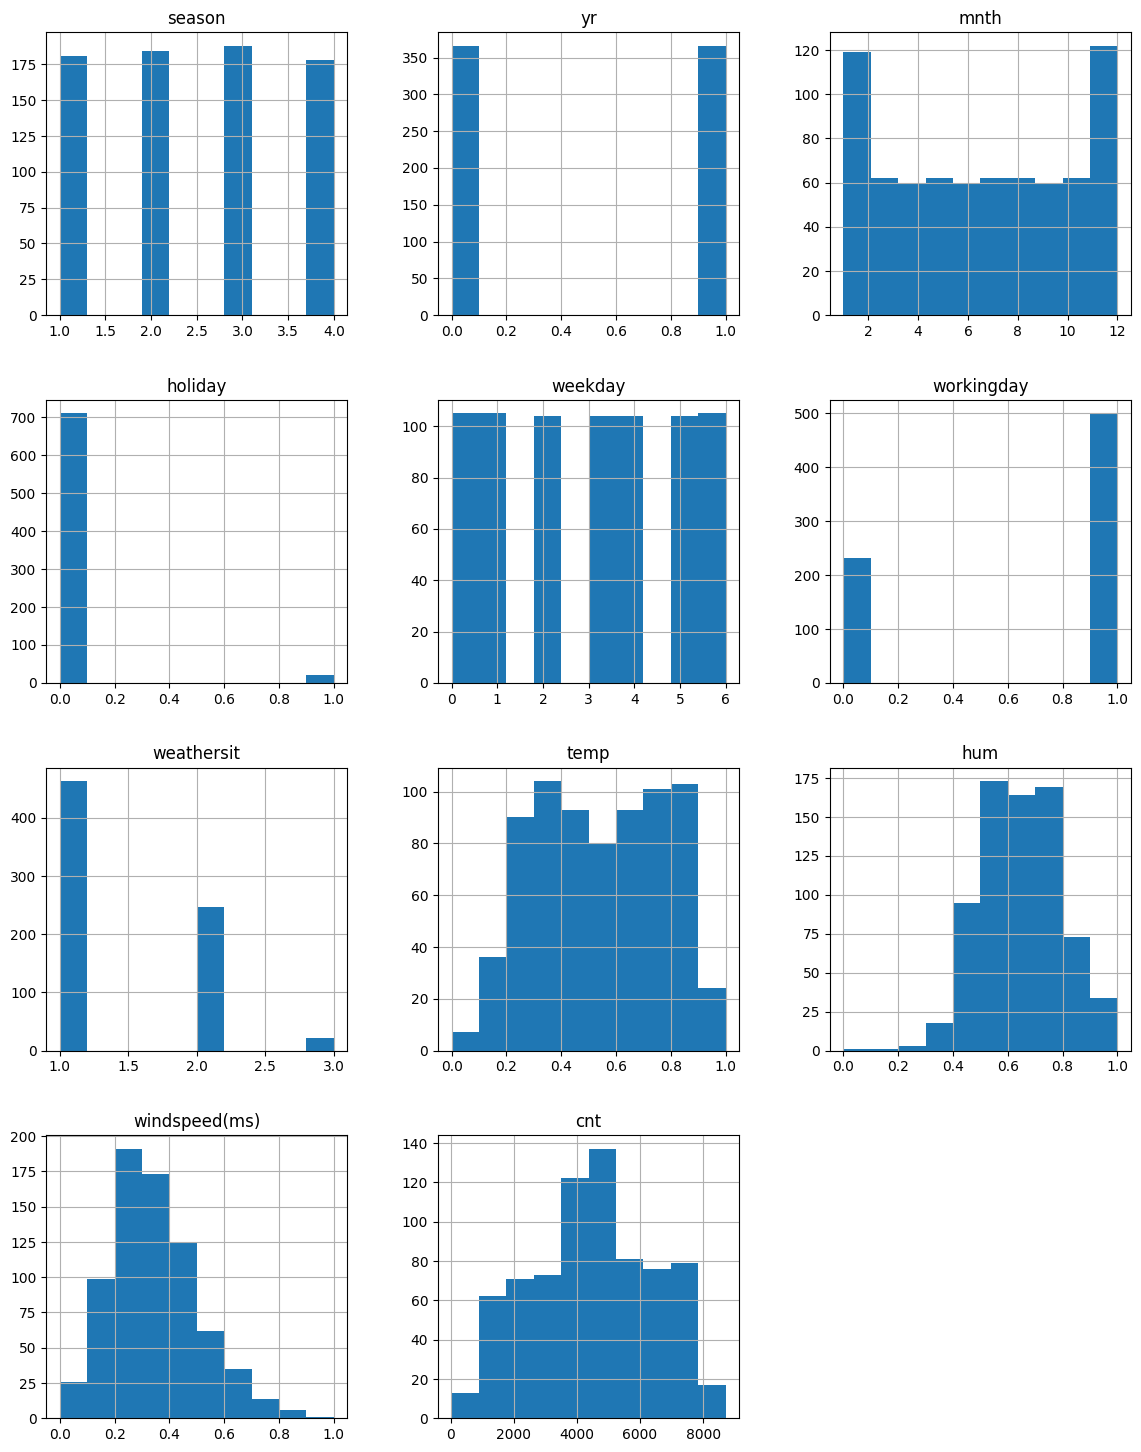

In [258]:
data.hist(figsize=(14, 18));

**Вопрос**: почему в датасете больше данных о прокате велосипедов в 1 и 12 месяцы?

Давайте посмотрим на распределение по сезонам

In [259]:
data['season']

0      1
1      1
2      1
3      1
4      1
      ..
726    1
727    1
728    1
729    1
730    1
Name: season, Length: 731, dtype: int64

In [260]:
data['season'].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

Визуализируем данные при помощи библиотеки matplotlib

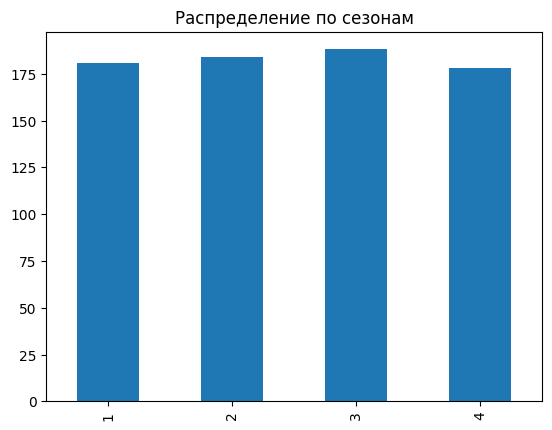

In [261]:
import matplotlib.pyplot as plt

data['season'].value_counts().sort_index().plot(kind='bar', )
plt.title('Распределение по сезонам');

Визуализируем распределение по месяцам с нужным количеством бинов

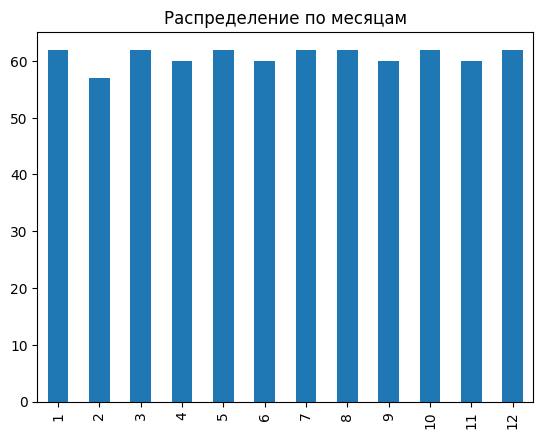

In [262]:
data['mnth'].value_counts().sort_index().plot(kind='bar', )
plt.title('Распределение по месяцам');

Рассчитаем максимальную температуру для определенного сезона

In [263]:
cond = data['season'] == 3 #маска для фильтрации
data[cond]['temp'].max()

1.0

#### Задача 1. Изучение признаков

Напишите код для извлечение значения **минимальной температуры** во **втором сезоне**.

In [264]:
### Здесь Ваш код
data[data.season == 2]['temp'].min()

0.2416246187401297

### Шаг 3. Подготовка данных

В нашей таблице содержатся и признаки, и целевая переменная. Разделим их с помощью специальной команды:

In [265]:
X = data.drop(['cnt'], axis=1) #отберем все колонки кроме последней - так как в последней находится целевая переменная
Y = data["cnt"] #запишем в у целевую переменную

Это код, использующий библиотеку Pandas. Квадратные скобки означают выделение столбцов, внутри записываются желаемые столбцы.

Теперь у нас есть таблица признаков объектов, хранящаяся в переменной X, и значения целевой переменной ("ответы"), хранящиеся в переменной Y.

Следующий важный шаг - разделить данные на обучающую и тестовую части. Это позволит нам оценивать качество модели на данных, которые она еще не "видела".


Для разделения данных мы будем использовать библиотеку sklearn. Импортируем специальную функцию:

In [266]:
from sklearn.model_selection import train_test_split #импортируем функцию для разбиения данных на тестовую и обучающую выборки

Внутри функции `train_test_split` записываем данные, X и Y, также указываем дополнительные параметры: `test_size` - какую долю объектов мы бы хотели отделить в тестовую выборку (укажем 30%), а также параметр `random_state`. Деление данных выполняется _случайно_ (случайно выбранные строки размещаются в обучающей и тестовой частях), и чтобы при повторном выполнении ячейки выполнялось одно и то же разделение данных, мы указываем параметр `random_state`. Само указанное значений 1 не несет никакой смысловой нагрузки, важно только указать то же самое значение при повторном вызове ячейки.

In [267]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) #реализуем разделение на train и test

В результате мы получили переменные:
* `X_train` - таблица признаков для объектов _обучающей_ части данных (выборки)
* `X_test` - таблица признаков для объектов _тестовой_ выборки
* `Y_train` - вектор правильных ответов для объектов _обучающей_ выборки
* `Y_test` - вектор правильных ответов для объектов _тестовой_ выборки

Посмотрим, сколько объектов попало в обучающую часть:

In [268]:
X_train.shape #511 строчек и 10 столбцов - 511 объектов и для каждого 10 признаков

(511, 10)

Аналогично для тестовой части:

In [269]:
X_test.shape #220 строчек и 10 столбцов - 220 объектов и для каждого 10 признаков

(220, 10)

Число 10 означает 10 признаков.

### Шаг 4. Обучение линейной модели


**Линейная модель** суммирует значение всех признаков с некоторыми весами.

**Веса при признаках** - параметры, которые необходимо настраивать в процессе обучения

$$
a(x) = w_0 + w_1 \cdot x_1 + ... + w_d \cdot x_d
$$

где $d$ - число признаков.

Мы готовы к тому, чтобы построить модель машинного обучения. Обучим линейную модель на наших данных. Для этого импортируем алгоритм LinearRegression из модуля sklearn:

In [270]:
from sklearn.linear_model import LinearRegression #импортируем алгоритм для обучения линейной регрессии

Обучение модели в sklearn всегда состоит из двух шагов - создания модели (первая строка) и вызова функции fit:

In [271]:
model = LinearRegression() #определяем модель
model.fit(X_train, Y_train) #обучаем модель на обучающей выборке

LinearRegression()

Для обучения обязательно нужны обе переменные `X_train` и `Y_train`, так как в процессе обучения модель учится предсказывать целевые переменные по признакам.

После обучения "внутри" модели появились найденные веса:

In [272]:
model.coef_ #смотрим на коэффициенты - веса признаков

array([  509.48861507,  2062.52245211,   -30.73634245,  -338.69185468,
          76.97387379,    89.58240591,  -598.02944105,  4042.47209273,
       -1223.10419882, -1155.30619654])

In [273]:
model.intercept_ #свободный коэффициент

1964.5674308562984

Мы проанализируем эти веса позже, пока мы просто проверили, что они появились.

### Шаг 5. Получение предсказаний линейной модели

Чтобы выполнить предсказания, нужно воспользоваться функцией `model.predict(X)`, подставив вместо X нужную переменную. Функция возвращает последовательность из предсказаний для каждого объекта, их нужно сохранить в какую-то переменную.

Выполним предсказания на двух выборках, обучающей и тестовой, и сохраним их в переменные preds_train и preds_test.

In [274]:
preds_train = model.predict(X_train) #предсказываем значения целевой переменной для обучающей выборки
preds_test = model.predict(X_test) #предсказываем значение целевой переменной для тестовой выборки

Посмотрим на предсказания на первых 10 объектах ([:10] выделяет первые 10 чисел):

In [275]:
preds_test[:10] #выведем значения с первого по десятое

array([4195.80550625, 2749.82679108, 4755.93175417, 4390.36500512,
       6136.25901946, 4880.3193712 , 5722.67265018, 3405.08819873,
       2129.20480728, 5396.45558   ])

А вот соответствующие правильные ответы из выборки:

In [276]:
Y_test[:10].values #выводим первые десять значений целевой переменной тестовой выборки

array([3830, 2114, 3915, 4322, 6591, 5204, 5323, 3351, 3068, 4972])

Сравнив два набора, можно увидеть, что в целом модель примерно "попадает" в порядок, но, конечно, не дает точных ответов, так как модели машинного обучения исходно задуманы, чтобы находить приближенные ответы. На следующем шаге мы более полноценно оценим, насколько точны предсказани модели.

### Шаг 6. Оценивание качества

Сравнивать предсказания и правильные ответы вручную удобно только на маленькой выборке данных. Для оценивания качества работы модели лучше измерить метрику качества. Для этого в `sklearn` есть подмодуль `metrics`. Импортируем функции  `mean_squared_error` и `mean_absolute_error`:

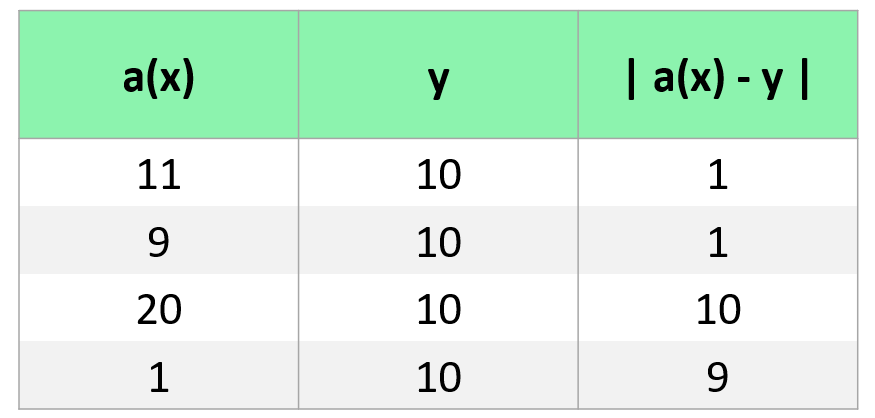

**Среднее квадратическое отклонение или MSE (Mean Squared Error):**

$$ MSE = \frac{1}{l} \sum_{i=1}^{l} (a(x_i) - y_i) ^ 2 $$

$l$ - число объектов в выборке

В примере:

$$ MSE = \frac{1}{4} (1 + 1 + 100 + 81) = 45.75 $$

In [277]:
from sklearn.metrics import mean_squared_error  #импортировали функцию для поиска значения метрики MSE

Вычисляем ошибку на обучающей и тестовой выборке:

In [278]:
print('MSE train: ', mean_squared_error(Y_train, preds_train))
print('MSE test:  ', mean_squared_error(Y_test, preds_test))

MSE train:  744485.6766957658
MSE test:   795472.9532967434


В функции нужно подставить переменные, хранящие правильные ответы и предсказанные.

При истользовании метрики MSE обе ошибки измеряются в "количестве велосипедов" в квадрате, что сложно интерпретировать. Но можно взять квардратный корень:

In [279]:
import numpy as np
print('RMSE train: ', np.sqrt(mean_squared_error(Y_train, preds_train)))
print('RMSE test:  ', np.sqrt(mean_squared_error(Y_test, preds_test)))

RMSE train:  862.8358341514137
RMSE test:   891.8929046117272


**Среднее абсолютное отклонение или MAE (Mean Absolute Error):**

$$ MAE = \frac{1}{l} \sum_{i=1}^{l} |a(x_i) - y_i| $$

$l$ - число объектов в выборке

В примере:

$$ MAE = \frac{1}{4} (1 + 1 + 10 + 9) = 5.25 $$

In [280]:
from sklearn.metrics import mean_absolute_error #импортировали функцию для поиска значения метрики MAE

Вычисляем ошибку на обучающей и тестовой выборке:

In [281]:
print('MAE train: ', mean_absolute_error(Y_train, preds_train)) #нашли величину MAE для обучающей выборки
print('MAE test:  ', mean_absolute_error(Y_test, preds_test)) #нашли величину MAE для тестовой выборки

MAE train:  660.1322315434204
MAE test:   629.1711367834721


При истользовании метрики MAE обе ошибки измеряются в "количестве велосипедов", то есть в среднем модель ошибается примерно на 630 велосипедов в день. Много это или мало? На предыдущем шаге мы увидели, что сами предсказываемые величины (число арендованных велосипедов) измеряются в тысячах - 4000, 6000 и т. д. Таким образом, ошибка почти на порядок меньше предсказываемых величин, что выглядит вполне разумно. Важно понимать, что модель построена всего по нескольким сотням объектов, и на такой маленькой выборке данный результат можно вполне считать хорошим.

Разрыва между ошибкой на обучающей и тестовой частях данных у нас нет, значит, переживать из-за возможности переобучения не стоит.

### Шаг 7. Анализ модели

Посмотрим на веса признаков, найденные линейной моделью по обучающим данным. Запишем их в таблицу со столбцами "название признака" и "вес признака" и отсортируем по значениям весов:

In [282]:
weights_data = {"веса": model.coef_,
                "признаки": data.columns[:-1]} #задаем с помощью словаря веса и признаки модели
weights = pd.DataFrame(weights_data) #преобразовываем признаки с весами в таблицу
weights.sort_values("веса") #сортируем полученную таблицу

,веса,признаки
8,-1223.104199,hum
9,-1155.306197,windspeed(ms)
6,-598.029441,weathersit
3,-338.691855,holiday
2,-30.736342,mnth
4,76.973874,weekday
5,89.582406,workingday
0,509.488615,season
1,2062.522452,yr
7,4042.472093,temp


Внизу и вверху таблицы расположены признаки, вносящие сильный вклад в предсказание, так как для них подобраны большие веса. Например, чем выше температура (temp), тем больше арендуют велосипедов; а чем выше показатель "плохой погоды" (weathersit), тем меньше арендуют велосипедов, и оба этих признака сильно влияют на аренду. Обе тенденции вполне логичны. В середине таблицы расположены признаки с маленькими весами, которые вносят малый вклад в предсказание.

# Бонус

### Поэкспериментируем с моделью

В следующих нескольких задачах мы попробуем немного менять нашу модель и посмотрим, можно ли достичь _меньшей_ ошибки.


Для начала давайте исследуем эффект отключения свободного коэффициента в формуле линейной модели. Вспомним, как линейная модель выполняет предсказания:
$$a(x) = w_1 \cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3+ \dots +w_d \cdot x_d +w_0 $$

Каждый из коэффициентов (весов) $w_1, \dots, w_d$ задает вклад соответствующего признака в предсказание. Последним в формуле следует коэффициент $w_0$, который задает, какое предсказание будет выполнено, если значения _всех_ признаков равны 0.

Давайте попробуем убрать $w_0$ из модели и посмотрим, как изменится средняя ошибка предсказания. Одновременно это будет хорошим упражнением по использованию библиотеки sklearn.

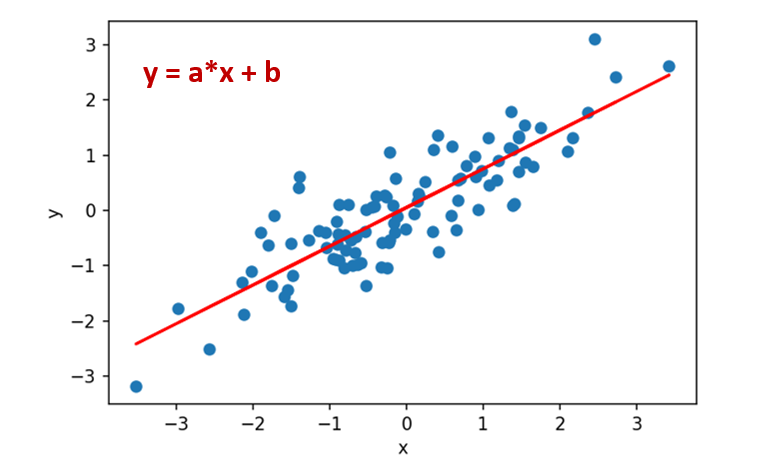

### Задания для самостоятельной работы

Перед выполнением заданий обязательно выполните все ячейки выше.
__При выполнении заданий используйте примеры кода, данные выше, а также__ [__таблицу с подсказками__](https://drive.google.com/file/d/1uQBr8a-CiQYJzuBIwIa2jBz7zDEab-hk/view?usp=sharing).

#### Задача 2. Обучение линейной модели без свободного коэффициента

Запишите код для __обучения__ модели (см. таблицу с подсказками по ссылке выше), а __далее внутри скобок в первой строчке__ укажите `fit_intercept=False`.

In [283]:
### Здесь Ваш код

model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)


LinearRegression(fit_intercept=False)

#### Задача 3. Получение предсказаний линейной модели без свободного коэффициента

Выполните __предсказания__ с помощью модели, обученной в предыдущей задаче. Отдельно выполните предсказания для обучающей части данных (`X_train`), отдельно - для тестовой (`X_test`).

In [284]:
### Здесь Ваш код

preds_train = model.predict(X_train)
preds_test = model.predict(X_test)

#### Задача 4. Измерение ошибки линейной модели без свободного коэффициента

Выведите значение ошибки для предсказаний, выполненных в предыдущей задаче. Выведите отдельно ошибку на обучающей части данных и отдельно - на тестовой.

In [285]:
### Здесь Ваш код
print(mean_absolute_error(preds_train, Y_train))
print(mean_absolute_error(preds_test, Y_test))

698.5010864989221
641.4043311978814


__Сравните__ полученные значения ошибки с теми, что мы получали ранее. Позитивно или негативно сказалось отключение свободного коэффициента на ошибке линейной модели?

### Кодирование категориальных признаков

В наших данных есть несколько признаков, которые принимают значения из фиксированного небольшого набора. Речь идет о признаках месяца, дня недели и сезона, и называются такие признаки _категориальными_. В текущем виде наших данных эти признаки просто пронумерованы. Это не лишено смысла, потому что и дни недели, и месяцы являются упорядоченными. Но с другой стороны, когда мы применяем линейную модель, она умножает значения признаков на веса, и, например, умножение "понедельника" на 2 не делает его "вторником", а значит, применять такое умножение не очень корректно.

Обычно для категориальных признаков используют дополнительную обработку, чтобы избежать таких некорректностей. В частности, вместо одного категориального признака создают несколько новых признаков, принимающих значения 0 и 1. Например, для признака "сезон" будет создано 4 новых, каждый отвечающий за конкретный сезон. Если в конкретный день было лето, то значение признака "сезон-лето" будет равно 1, а значения признаков "сезон-весна", "сезон-осень" и "сезон-зима" будут 0.


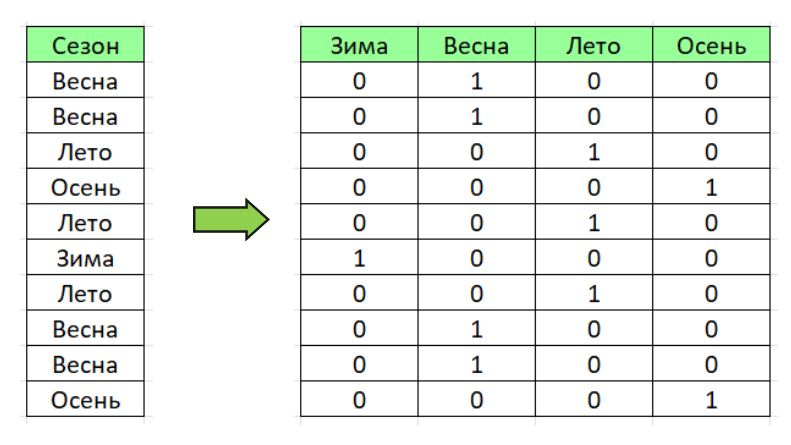

Попробуем применить такую обработку к нашим данным. Для этого воспользуемся функций `get_dummies` из библиотеки `pandas`:

In [286]:
data_cat = pd.get_dummies(data, #задаем, для каких данных делаем дамми-переменные
                          columns=["season", "mnth", "weekday"], #определяем признаки, для которых будут создаваться дамми-переменные
                          drop_first=True) #устанавливаем удаление первой переменной

data_cat.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed(ms),cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,2,0.355170,0.828620,0.284606,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,0.379232,0.715771,0.466215,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0.171000,0.449638,0.465740,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,0.175530,0.607131,0.284297,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0.209120,0.449313,0.339143,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


Внутри `pd.get_dummies` мы указываем нашу таблицу с данными data, которую мы загрузили в самом начале занятия, и также указываем в списке, какие столбцы необходимо закодировать нулями и единицами, у нас это `["season", "mnth", "weekday"]`. Также укажем аргумент `drop_first=True`, он позволяет убрать избыточность столбцов (для каждого признака одну категорию можно пропустить при кодировании, так как она выводится из остальных).

Теперь, прежде чем построить модель, нам придется повторить предобработку данных: отделение X и Y, деление на обучающую и тестовую части.

Начнем с X и Y:

In [287]:
X_cat = data_cat[data_cat.columns.drop("cnt")]#задаем массив с обработанными признаками
Y_cat = data_cat["cnt"] #задаем целевую переменную из массива с обработанными признаками

#### Задача 5. Деление данных на обучение и тест

Разделите данные на обучающую и тестовую части. В подсказке деление данных показано на второй странице.

In [304]:
### Здесь Ваш код
X_train, X_test, Y_train, Y_test = train_test_split(
    X_cat, Y_cat, test_size = 0.3, random_state = 1243
    )

#### Задача 6. Обучение, предсказание и вычисление ошибки с закодированными категориальными признаками

Повторите шаги задач 1-3, то есть обучение, выполнение предсказаний и оценивание ошибки, для новой версии данных, включающей обработанные категориальные признаки.

In [305]:
### Здесь Ваш код

model = LinearRegression()
# обучение модели
model.fit(X_train, Y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)

print("Train:", mean_absolute_error(Y_train, preds_train))
print("Test:", mean_absolute_error(Y_test, preds_test))

Train: 699.8509921120339
Test: 739.8772846035939


__Сравните__ полученные значения ошибки с предыдущими моделями.

Посмотрим на веса новой модели:

In [306]:
weights_data = {"веса":model.coef_,\
                "признаки": data_cat.columns.drop("cnt")}
weights = pd.DataFrame(weights_data)
weights.sort_values("веса")

,веса,признаки
21,-1.851239e+17,weekday_1
23,-1.851239e+17,weekday_3
22,-1.851239e+17,weekday_2
25,-1.851239e+17,weekday_5
24,-1.851239e+17,weekday_4
15,-2.336115e+03,mnth_7
16,-2.076510e+03,mnth_8
6,-1.719595e+03,windspeed(ms)
19,-1.210000e+03,mnth_11
13,-9.002733e+02,mnth_5


Теперь у каждой категории есть свой вес. Например, месяцы апрель, май, сентябрь, октябрь (`mnth_4`, `mnth_5`, `mnth_9`, `mnth_10`) имеют большие положительные веса, то есть в эти месяцы арендуют много велосипедов, а месяцы декабрь и февраль (`mnth_12` и `mnth_2`) имеют малые значения весов, так как в эти месяцы велосипедов арендуют меньше.

### Отбор признаков

Основная цель построения модели машинного обучения - получить модель с наиболее точными предсказаниями и с наименьшим значением ошибки. И как правило, для достижения этой цели стоит использовать все доступные  данные, в том числе, все доступные признаки (характеристики объектов). Какие признаки нужны для качественных предсказаний, а какие нет - заранее не известно, при этом использование большого количества признаков может замедлить работу модели и даже иногда повысить ошибку. Поэтому часто выполняют _отбор признаков_, то есть используют специальные методы, позволяющие оставить только нужные признаки.

В линейных моделях есть специальный метод для отбора признаков, называемый _регуляризацией Lasso_. Это такой механизм, который во время обучения требует, чтобы не только ошибка на обучающих данных была как можно ниже, но и чтобы веса были как можно более близки к нулю и чтобы часть из них приняла нулевые значения. А если какой-то признак умножается на нулевой вес, это равносильно удалению этого признака. Давайте применим этот механизм к нашим данным и посмотрим, какие признаки отберет модель.

Импортируем модель `Lasso`, выполним обучение, предсказание и оценку ошибки:

In [307]:
from sklearn.linear_model import Lasso #импортируем модель для построения Лассо-регрессии

In [308]:
model = Lasso() #определяем модель
model.fit(X_train, Y_train) #обучаем модель
preds_train = model.predict(X_train) #делаем предсказание для обучающих данных
preds_test = model.predict(X_test) #делаем предсказание для тестовых данных

print("Ошибка на обучении:", mean_absolute_error(Y_train, preds_train)) #находим значение МАЕ для обучающей выборки
print("Ошибка на тесте:", mean_absolute_error(Y_test, preds_test)) #находим значение МАЕ для тестовой выборки
print("Число активных признаков:", sum(model.coef_!=0), \
      "/", model.coef_.shape[0])

Ошибка на обучении: 577.907786058344
Ошибка на тесте: 562.4378975055823
Число активных признаков: 25 / 27


Посмотрим на веса:

In [309]:
weights_data = {"веса":model.coef_,\
                "признаки": data_cat.columns.drop("cnt")}
weights = pd.DataFrame(weights_data)
weights.sort_values("веса")

,веса,признаки
6,-1387.473421,windspeed(ms)
5,-1264.282853,hum
3,-715.559833,weathersit
1,-497.297720,holiday
15,-344.944689,mnth_7
19,-282.724183,mnth_11
20,-142.343908,mnth_12
21,-97.142537,weekday_1
22,-31.323280,weekday_2
16,0.000000,mnth_8


Обнулились веса при нескольких признаках, но ошибка стала чуть-чуть больше!

Небольшая загвоздка состоит в том, что в модели Lasso, которую мы использовали, есть коэффициент, отвечающий за баланс между ошибкой и количеством обнуленных весов, и при разных значениях этого коэффициента мы можем получить разный результат. Попробуем менять этот коэффициент!

#### Задача 7. Выбор коэффициента в модели Lasso

Коэффициент задается через параметр `alpha`: `Lasso(alpha=0.1)`. Попробуйте использовать коэффициенты 0.00001, 0.001, 1, 10, 100, 1000. Для каждого значения коэффициента повторите наши стандартные шаги: обучение, выполнение предсказания, оценивание ошибки на обучающих и тестовых данных. Кроме того, нужно вывести текущее значение alpha и количество ненулевых весов (код для этого дан выше в ячейке с обучением модели Lasso).

__Упрощенная версия:__ создайте несколько новых ячеек с помощью кнопки +Code слева вверху, в каждую скопируйте код с моделью Lasso и поменяйте значение коэффициента.

__Стандартная версия:__ используйте цикл, чтобы перебрать различные значения коэффициента `alpha`. Ниже приведен пример цикла.

In [310]:
# напоминание: циклы
for number in [0.1, 1, 10]:
    print("Текущее число:", number)

Текущее число: 0.1
Текущее число: 1
Текущее число: 10


In [311]:
### Здесь Ваш код

for alpha_log in range(-5, 4):
    alpha = 10**alpha_log

    model = Lasso(alpha = alpha)
    # обучение модели
    preds_train = model.fit(X_train, Y_train).predict(X_train)
    preds_test = model.predict(X_test)

    print("Alpha:", alpha)
    print("Ошибка на обучении:", mean_absolute_error(Y_train, preds_train))
    print("Ошибка на тесте:", mean_absolute_error(Y_test, preds_test))
    print("Число активных признаков:", sum(model.coef_!=0), \
      "/", model.coef_.shape[0])


Alpha: 1e-05
Ошибка на обучении: 576.3827054252389
Ошибка на тесте: 560.4263796458806
Число активных признаков: 27 / 27
Alpha: 0.0001
Ошибка на обучении: 576.3828262090354
Ошибка на тесте: 560.4265952422721
Число активных признаков: 27 / 27
Alpha: 0.001
Ошибка на обучении: 576.384034047004
Ошибка на тесте: 560.4287512061842
Число активных признаков: 27 / 27
Alpha: 0.01
Ошибка на обучении: 576.3961124266845
Ошибка на тесте: 560.4503108453029
Число активных признаков: 27 / 27
Alpha: 0.1
Ошибка на обучении: 576.515246856409
Ошибка на тесте: 560.6545801896209
Число активных признаков: 26 / 27
Alpha: 1
Ошибка на обучении: 577.907786058344
Ошибка на тесте: 562.4378975055823
Число активных признаков: 25 / 27
Alpha: 10
Ошибка на обучении: 603.8474088805168
Ошибка на тесте: 596.0063256027697
Число активных признаков: 19 / 27
Alpha: 100
Ошибка на обучении: 903.0770576871769
Ошибка на тесте: 966.2056027127094
Число активных признаков: 4 / 27
Alpha: 1000
Ошибка на обучении: 1566.9312387743614
Ошиб

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.757e+05, tolerance: 1.902e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.758e+05, tolerance: 1.902e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.763e+05, tolerance: 1.902e

В выводе могло появиться предупреждающее сообщение - оно говорит, что модель обучилась некачественно (это случилось для самых больших значений коэффициента alpha).

Мы получили, что при малых значениях `alpha` веса не обнуляются,  ошибка остается такой же, какую мы получали раньше. При больших значениях `alpha` большинство весов обнуляются (то есть соответствующие признаки исключаются из модели), а ошибка растет. Это означает, что мы слишком сильно ограничили нашу модель, и она не может подстроиться под данные. При средних значениях `alpha` обнуляется небольшое количество весов, а ошибка остается на приемлемом уровне - такие значения являются оптимальными.

### Итоги экспериментов с линейной моделью

* Отключение свободного коэффициента ухудшает качество предсказаний, не стоит его отключать
* Грамотная обработка категориальных признаков позволила значительно улучшить качество модели (уменьшить ошибку)
* Часть признаков могут быть исключены из модели практически без потери качества

#### Дополнительная задача: метрика Mean absolute percentage error

Мы измеряли качество модели с помощью наиболее простой метрики Mean absolute error (MAE). Она измеряется в тех же единицах, что и целевая переменная, в нашем случае это число велосипедов. Но часто хочется иметь метрику в процентах. И, конечно, метрику легко модифицировать так, чтобы она принимала значения в процентах - получится Mean absolute percentage error (MAPE):
$$Q(a) = \frac 1 N \sum_{n=1}^N \frac {|y_n-a(x_n)|}{|y_n|}$$

В данной формуле выполняется суммирование по объектам выборки, далее ошибка предсказания $|y_n-a(x_n)|$ на каждом объекте делится на модуль целевой переменной $|y_n|$. Получается, мы смотрим, на какой процент от той, величины, что мы хотим предсказать, модель в среднем ошибается. Вместо среднего можно использовать медиану для большей устойчивости к выбросам. Попробуйте измерить такую метрику, а точнее, ее реализовать.

Вам потребуются следующие функции из библиотеки Numpy:
* `np.mean` - вычисление среднего
* `np.median` - вычисление медианы
* `np.abs` - вычисление модуля

Также в numpy можно вычитать и складывать вектора, см. пример ниже.

In [312]:
import numpy as np #импортируем библиотеку numpy как np

x = np.array([-5, -1, 3, 5, 100]) #задаем массив numpy

print("Среднее:", np.mean(x)) #вычисляем среднее для чисел в массиве

print("Медиана:", np.median(x)) #вычисляем медиану для чисел в массиве

print("Поэлементный модуль:", np.abs(x)) #вычисляем модули для чисел в массиве

print("x - x:", x-x)

Среднее: 20.4
Медиана: 3.0
Поэлементный модуль: [  5   1   3   5 100]
x - x: [0 0 0 0 0]


Заполните функцию:

In [318]:
def mean_absolute_percentage_error(y_true, y_predicted, use_median=True):
    """
    Вычисляет Mean absolute percentage error по формуле, данной выше
    y_true: вектор правильных ответов для каждого объекта, например [3, 5, 7]
    y_pred: вектор предсказаний для каждого объекта, например [2, 4, 8]
    use_median: если False, использовать np.mean для усреднения по объектам,
                если True, использовать np.median для усреднения по объектам,
    """
    if use_median:
        ### Здесь Ваш код
        mape = np.median(np.abs(y_true - y_predicted) / np.abs(y_true))
    else:
        ### Здесь Ваш код
        mape = np.mean(np.abs(y_true - y_predicted) / np.abs(y_true))
    return mape

Протестируем функцию:

In [321]:
# обучим модель для тестирования функции

model = LinearRegression()
model.fit(X_train, Y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)

In [320]:
# со средним
print("На обучении:", \
      mean_absolute_percentage_error(Y_train, preds_train, use_median=False))
print("На тесте:", \
      mean_absolute_percentage_error(Y_test, preds_test, use_median=False))

На обучении: 0.5666148683905797
На тесте: 0.22296579581367199


Здесь должны получиться значения около 0.18, что означает 18% средняя ошибка.

In [322]:
# с медианой
print("На обучении:", mean_absolute_percentage_error(Y_train, preds_train))
print("На тесте:", mean_absolute_percentage_error(Y_test, preds_test))

На обучении: 0.12281447945096707
На тесте: 0.14910038412008159


При использовании среднего получается MAPE на тестовой выборке около 1.33, то есть около 133%. Причина - в наличии нескольких объектов, для которых ошибка очень большая (редкие нерепрезентативные объекты), в то время как для большинства объектов ошибка около 10%. Использование медианы вместо среднего позволяет проигнорировать эти редкие объекты при вычислении метрики.